# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="outer")

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(merged_df['Mouse ID'].unique())
number_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ids = merged_df.loc[merged_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df[(merged_df["Mouse ID"]=="g989")]
duplicate_mouse_info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# CHECK ME
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = merged_df.drop_duplicates(subset = ["Mouse ID"], keep = "first" ,inplace=False, ignore_index=False)
#clean_df

clean_df= merged_df[(merged_df["Mouse ID"]!="g989")]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# CHECK ME
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
SEM = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()


stats_df = pd.DataFrame({"Mean": mean,
                        "Median": median,
                        "Variance": variance,
                        "Standard Deviation": standard_deviation,
                       "SEM": SEM})
stats_df

# Using the aggregation method, produce the same summary statistics in a single line.
stats_df_1 = stats_df.aggregate
stats_df_1

<bound method DataFrame.aggregate of                    Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398>

Text(0, 0.5, 'Number of Mice')

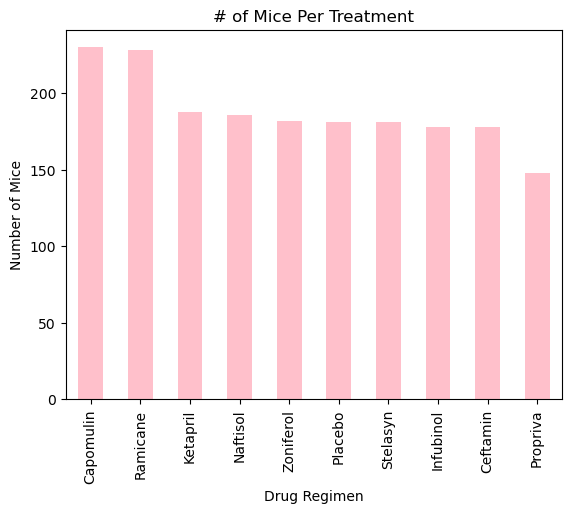

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
chart_df = clean_df["Drug Regimen"].value_counts()
chart_df.plot.bar(x="Drug Regimen", color ="pink", title = "# of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

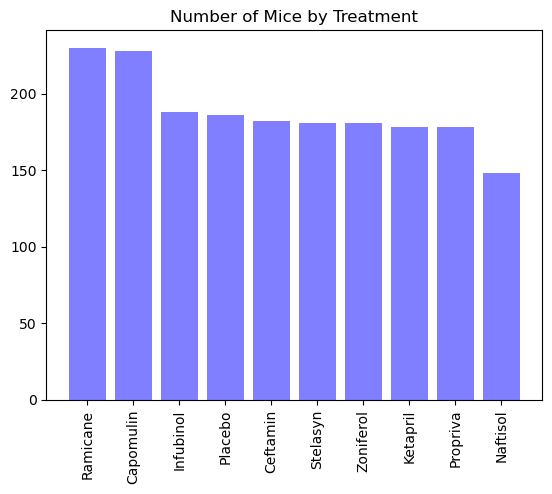

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
treatment = clean_df["Drug Regimen"].unique()
number_of_treatments = clean_df["Drug Regimen"].value_counts()

plt.bar(treatment, number_of_treatments, color = "blue", align = "center", alpha = .5)
plt.title("Number of Mice by Treatment")
plt.xticks(rotation = 90)


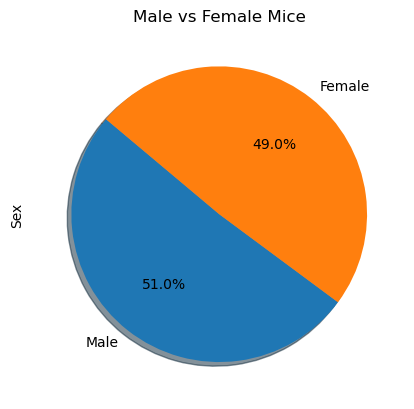

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df["Sex"].value_counts())
gender_df.plot.pie(y="Sex",autopct="%1.1f%%", shadow=True, startangle=140, legend = False)
plt.title("Male vs Female Mice")
plt.show()




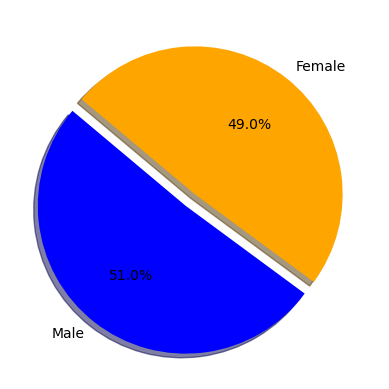

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
number = [51.0, 49.0]
colors = ["blue", 'orange']
explode = (0.1,0)

plt.pie(number, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()




## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# capomulin_df = final_merged_df[(final_merged_df["Drug Regimen"]=="Capomulin")]
# capomulin_df

# ramicane_df = final_merged_df[(final_merged_df["Drug Regimen"]=="Ramicane")]
# ramicane_df

# infubinal_df = final_merged_df[(final_merged_df["Drug Regimen"]=="Infubinal")]
# infubinal_df

# ceftamin_df = final_merged_df[(final_merged_df["Drug Regimen"]=="Ceftamin")]
# ceftamin_df
                            
# Start by getting the last (greatest) timepoint for each mouse
final_df = clean_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_df = pd.merge(final_df, clean_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'],how="inner")
final_merged_df




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# CHECK ME
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = final_merged_df["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if final_merged_df["Drug Regimen"] == treatment:
        tumor_volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        
        #add subset
        
        # Determine outliers using upper and lower bounds
        lower_bound = round(lowerq - (1.5*iqr),1)
        upper_bound = round(upperq + (1.5*iqr),1)
        print(f"{treatment}'s potential outliers: data below {lower_bound} and data above {upper_bound} could be considered potential outliars")
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

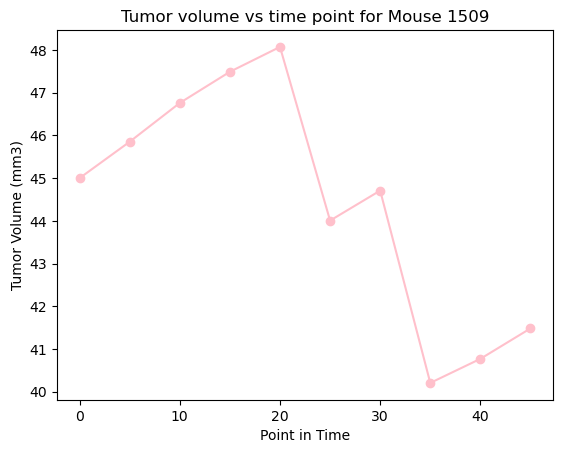

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse_data = merged_df[(merged_df["Mouse ID"]== "l509")]

x_axis = one_mouse_data["Timepoint"]
y_axis = one_mouse_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Tumor Volume Over Time: Mouse 1509")
plt.plot(x_axis, y_axis, marker="o",color="pink")
plt.xlabel("Point in Time")
plt.ylabel("Tumor Volume (mm3)")


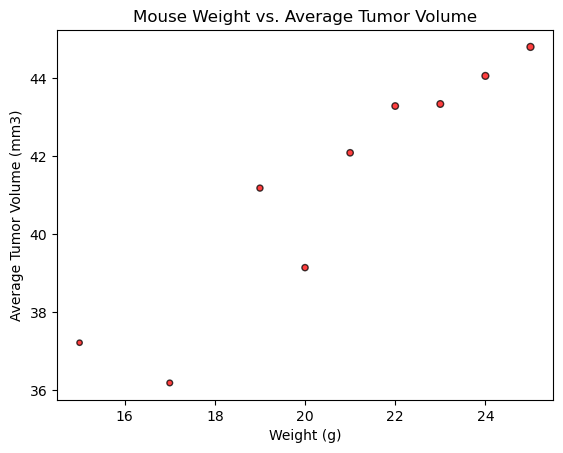

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# CHECK ME
# ASK ABOUT using pd.dataframe
scatter_data = merged_df[(merged_df["Drug Regimen"]== "Capomulin")]
average_data = pd.DataFrame(scatter_data["Tumor Volume (mm3)"].groupby(scatter_data["Weight (g)"]).mean())

x_axis = scatter_data["Weight (g)"].unique()
y_axis = average_data["Tumor Volume (mm3)"]
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)



## Correlation and Regression

The r-squared is: 0.873


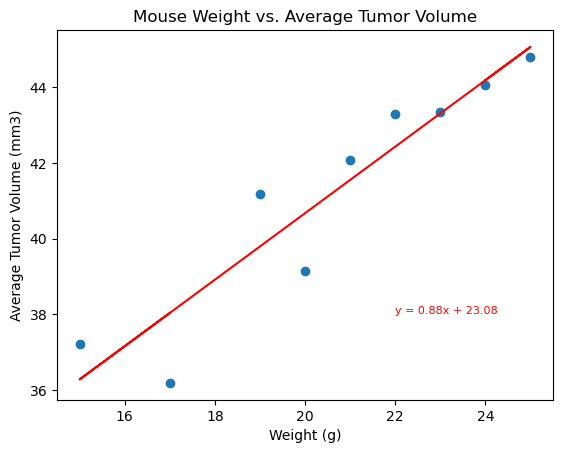

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_data["Weight (g)"].unique()
y_values = average_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(22,38),fontsize=8,color="red")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
